# a2 - python - CS4821

This assignment will cover topics from data, data preprocessing, and classification.

Make sure that you keep this notebook named as "a2-4821.ipynb" 

Submit the zip-file created after running your notebook on the Linux lab machines.

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.

## Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [1]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28|coc-15954-m)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - True


### Notebook Setup 

It is good practice to list all imports needed at the top of the notebook. You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.

If you are doing development on Colab, the otter-grader package is not available, so you will need to install it with pip (uncomment the cell directly below).

In [2]:
# Only uncomment if you developing on Colab 
# if COLAB == True: 
#     print("Installing otter:")
#     !pip install otter-grader==4.2.0 

In [3]:
# Import standard DS packages 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import textwrap
%matplotlib inline

from sklearn import tree        # decision tree classifier
from sklearn import neighbors   # knn classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import metrics     # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import pipeline
# import graphviz, pydotplus

from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score,mean_squared_error
from sklearn.metrics import confusion_matrix

# Package for Autograder 
import otter 
grader = otter.Notebook()

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
grader.check("q0")

q0 results: All test cases passed!

# Q1 - Exploratory Data Analysis 

Consider the `movies` data set available on Canvas. The data set is made up of over 600 randomly selected movies, released before 2016, with information extracted from IMDB and Rotten Tomatoes. A code book on the variables is also provided.

You should explore the files a bit in a text editor to understand the format. The variables are made up of different types: nominal, ordinal, numeric, etc. We will refer to the different variables by their column / codebook names.


<!-- BEGIN QUESTION -->

# *Missing Data*

## Q1(a) - Examine data for loading 

Look at the `movies` data set.  Is there any missing data in the `movies` data set? 
If so, how is it encoded? 

Missing data is encoded as: NA

<!-- END QUESTION -->

## Q1(b) - Load the data

Load the movies data into a DataFrame `q1movies`.  Is there any missing data in the `movies` data set? 
If yes, make sure to encode those missing values when reading the data in pandas `read_csv` function. 


In [5]:
# Read in movies data with pandas "read_csv" function
#  Use column names from the original csv file 
column_labels=['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 
               'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 
               'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 
               'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 
               'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url']

q1movies = pd.read_csv('movies.csv', names=column_labels, header=0, na_values=['NA'])

q1movies.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [6]:
grader.check("q1b")

q1b results: All test cases passed!

## Q1(c) - Missing data 

We want to understand where (which variable) and how much data is missing (for each variable the percentage of rows). 

In [7]:
# Create a Data.Series that has the percentage of missing data for each 
#  attribute in the movies data set.
miss_data = (q1movies.isna().sum() / len(q1movies)) * 100 

miss_data

title               0.000000
title_type          0.000000
genre               0.000000
runtime             0.154799
mpaa_rating         0.000000
studio              1.083591
thtr_rel_year       0.000000
thtr_rel_month      0.000000
thtr_rel_day        0.000000
dvd_rel_year        1.238390
dvd_rel_month       1.238390
dvd_rel_day         1.238390
imdb_rating         0.000000
imdb_num_votes      0.000000
critics_rating      0.000000
critics_score       0.000000
audience_rating     0.000000
audience_score      0.000000
best_pic_nom        0.000000
best_pic_win        0.000000
best_actor_win      0.000000
best_actress_win    0.000000
best_dir_win        0.000000
top200_box          0.000000
director            0.309598
actor1              0.309598
actor2              1.083591
actor3              1.393189
actor4              1.857585
actor5              2.167183
imdb_url            0.000000
rt_url              0.000000
dtype: float64

In [8]:
grader.check("q1c")

q1c results: All test cases passed!

## Q1(d) - Clean data 

We want to clean up data with respect to the missing values. 

Ignore any missing values in the `studio`, `dvd_rel_year`, `dvd_rel_month`, `dvd_rel_day`, and all variables including and listed after `best_pic_nom`. For other missing values, remove the sample that contains the missing value.

Save the resulting DataFrame in the `movies` variable.  

In [9]:
# Ignore missing values in "studio", "dvd_rel_year", "dvd_rel_month", 
#   "dvd_rel_day", and all varaibles including and after "best_pic_nom"
# For other missing values, remove the sample that contains the missing value. 

columns_to_ignore=['studio', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 
                    'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 
                    'actor4', 'actor5', 'imdb_url', 'rt_url']

movies = q1movies.dropna(subset=[col for col in q1movies.columns if col not in columns_to_ignore])

movies.shape

(645, 32)

In [10]:
grader.check("q1d")

q1d results: All test cases passed!

## Q1(e) - Attribute Types

For the following variables, state the attribute type: 1- *nominal*, 2- *ordinal*, 3- *interval*, or 4- *ratio*. 

In [11]:
type_genre = 1
type_runtime = 4
type_mpaa_rating = 2
type_studio = 1
type_thtr_rel_month = 3
type_imdb_rating = 4
type_audience_score = 1
type_best_pic_win = 2

In [12]:
grader.check("q1e")

q1e results: All test cases passed!

# *Summary Statistics*

## Q1(f) - Statistics, part 1

For the following variables, report out a five number summary:
`audience_score` and `imdb_rating`

Store results in a DataFrame: `q1f`

*Hint:* consider using the `describe` function.


In [13]:
# Report five number summary for variables `audience_score` and `imdb_rating` in 
#  a DataFrame "q1f" 
#  Rows should represent: min, Q1 - 25%, Q2 - 50%, Q3 - 50%, max 
#  Columns should be `audience_score` then `imdb_rating` 

# Compute summary statistics for both 'audience_rating' and 'imdb' columns
summary_columns = q1movies[['audience_score', 'imdb_rating']].describe()

q1f = summary_columns.loc[['min', '25%', '50%', '75%', 'max']]

q1f

,audience_score,imdb_rating
min,11.0,1.9
25%,46.0,5.9
50%,65.0,6.6
75%,80.0,7.3
max,97.0,9.0


In [14]:
grader.check("q1f")

q1f results: All test cases passed!

## Q1(g) - Statistics, part 2 

Report the mean, median, and mode of `critics_score` and `runtime` to the given variables. 

In [15]:
# Report mean, median and mode of "critics_score" and "runtime" 

# For critics_score- 
q1g_cs_mean = q1movies['critics_score'].mean()
q1g_cs_median = q1movies['critics_score'].median()
q1g_cs_mode = statistics.mode(q1movies['critics_score'])

# For runtime- 
q1g_r_mean = q1movies['runtime'].mean()
q1g_r_median = q1movies['runtime'].median()
q1g_r_mode = statistics.mode(q1movies['runtime'])

In [16]:
grader.check("q1g")

q1g results:
    q1g - 1 result:
        ❌ Test case failed
        Trying:
            round(q1g_cs_mean, 4) == 57.6341 and round(q1g_r_mean, 4) == 105.8527
        Expecting:
            True
        **********************************************************************
        Line 1, in q1g 0
        Failed example:
            round(q1g_cs_mean, 4) == 57.6341 and round(q1g_r_mean, 4) == 105.8527
        Expected:
            True
        Got:
            False

    q1g - 2 result:
        ✅ Test case passed

    q1g - 3 result:
        ✅ Test case passed

## Q1(h) - Statistics, part 3

Report the first quartile, 37th percentile, third quartile, and 83rd percentile
for `critics_score` and `runtime` and assign it to the given variables.  

In [17]:
# Report first quartile, 31st percentile, third quartile, and 90th percentile
#  of "critics_score" and "runtime" 

# For critics_score- 
q1h_cs_q1 = q1movies['critics_score'].quantile(0.25)
q1h_cs_p37 = q1movies['critics_score'].quantile(0.37)
q1h_cs_q3 = q1movies['critics_score'].quantile(0.75)
q1h_cs_p83 = q1movies['critics_score'].quantile(0.83)

# For runtime- 
q1h_r_q1 = q1movies['runtime'].quantile(0.25)
q1h_r_p37 = q1movies['runtime'].quantile(0.37)
q1h_r_q3 = q1movies['runtime'].quantile(0.75)
q1h_r_p83 = q1movies['runtime'].quantile(0.83)

In [18]:
grader.check("q1h")

q1h results:
    q1h - 1 result:
        ✅ Test case passed

    q1h - 2 result:
        ❌ Test case failed
        Trying:
            round(q1h_cs_p37, 4) == 47.28 and round(q1h_r_p37, 4) == 97.0
        Expecting:
            True
        **********************************************************************
        Line 1, in q1h 1
        Failed example:
            round(q1h_cs_p37, 4) == 47.28 and round(q1h_r_p37, 4) == 97.0
        Expected:
            True
        Got:
            False

    q1h - 3 result:
        ✅ Test case passed

    q1h - 4 result:
        ✅ Test case passed

<!-- BEGIN QUESTION -->

# *Visualizations* 

## Q1(i) Visualization: Single Variable 

I highly encourage looking at the [Fundamentals of Visualization](https://clauswilke.com/dataviz/index.html) reference book to guide in the creation of “good” visualizations requested below.


Create a bar plot for the `critics_rating` variable.

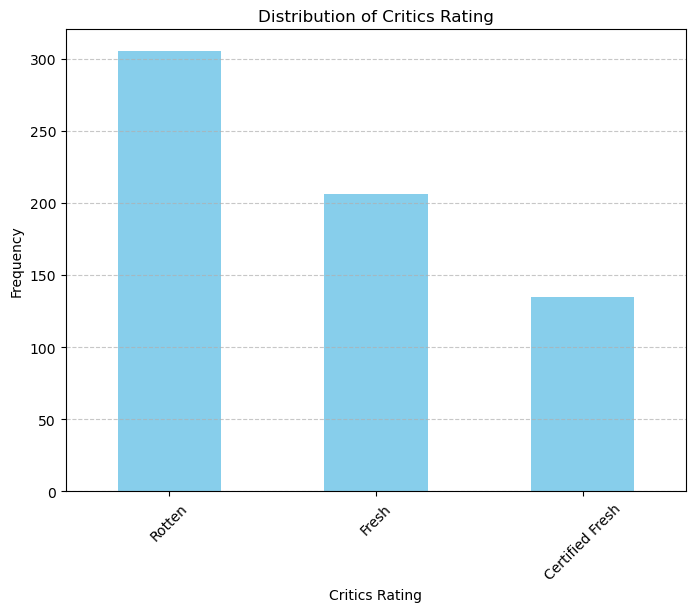

In [19]:
# Create bar plot for "critics_rating" 

# Count the occurrences of each unique value in 'critics_rating'
critics_rating_counts = q1movies['critics_rating'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
critics_rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Critics Rating')
plt.xlabel('Critics Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(j) Visualization: Two Variables 

Create a violin plot for `imdb_rating` grouped by `mpaa_rating` (sorted by mpaa rating, where 'Unrated' is last).



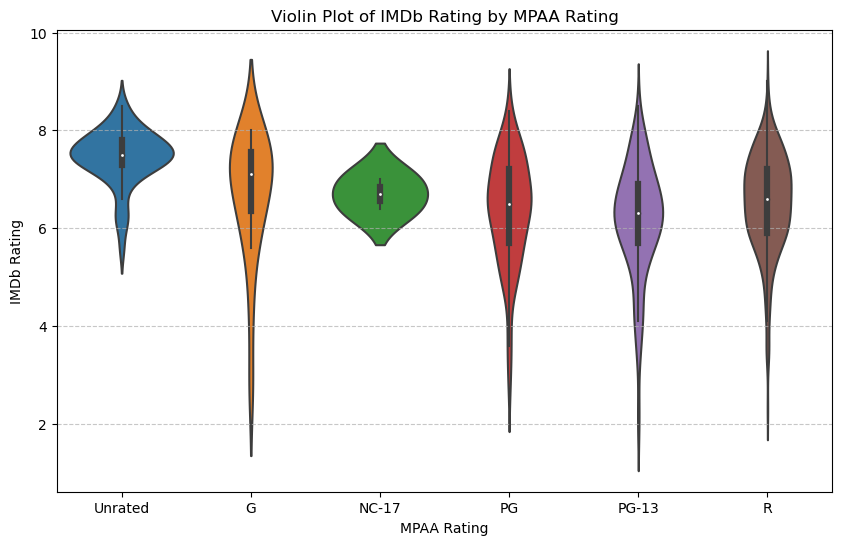

In [20]:
# Create a violin plot for `imdb_rating` grouped by `mpaa_rating` (sorted)

# Define the order of mpaa_rating sorted with 'Unrated' last
mpaa_order = sorted(q1movies['mpaa_rating'].unique(), key=lambda x: (x != 'Unrated', x))

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=q1movies, x='mpaa_rating', y='imdb_rating', order=mpaa_order)
plt.title('Violin Plot of IMDb Rating by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('IMDb Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(k) Visualization: Multiple variables

Create a stacked bar chart to display the proportion of wins (nominations) for the 5 `best_*` variables.


<Figure size 1000x600 with 0 Axes>

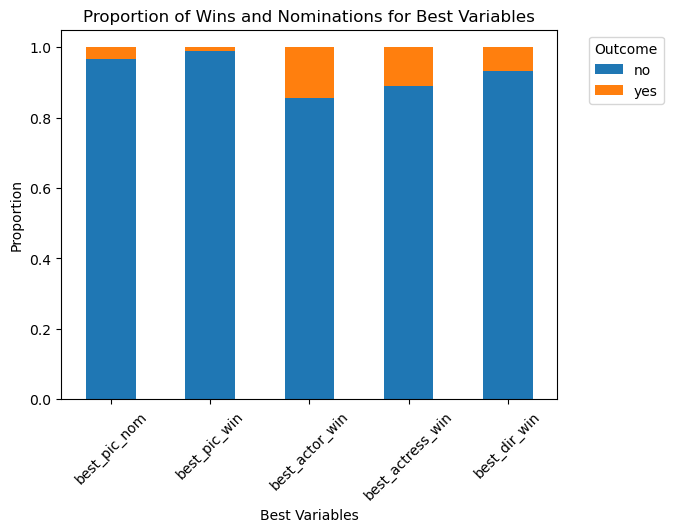

In [21]:
# Create a stacked bar chart to display the proportion of wins (nominations) 
#   for the 5 `best_*` variables.

# Select the 'best_*' variables
best_variables = ['best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win']

# Calculate the number of wins and nominations for each 'best_*' variable
wins_nominations = q1movies[best_variables].apply(lambda x: x.value_counts())

# Transpose the DataFrame and calculate proportions
wins_nominations = wins_nominations.transpose()
proportions = wins_nominations.div(wins_nominations.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Wins and Nominations for Best Variables')
plt.xlabel('Best Variables')
plt.ylabel('Proportion')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(l) Visualization: Two Variables 

Create an overlapping density plot for `critics_score` grouped by `audience_rating`. 

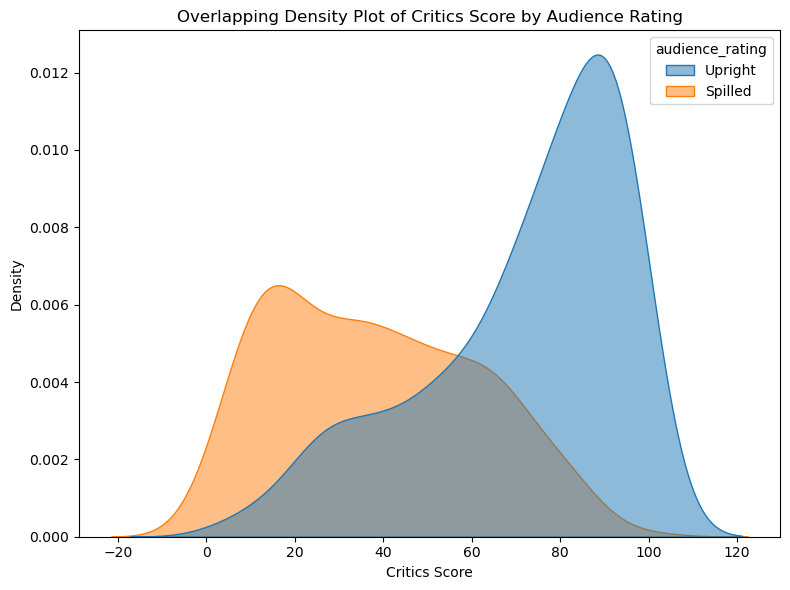

In [22]:
# Create overlapping density plot

# Create the overlapping density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=q1movies, x='critics_score', hue='audience_rating', fill=True, alpha=0.5)
plt.title('Overlapping Density Plot of Critics Score by Audience Rating')
plt.xlabel('Critics Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(m) Visualization: Multiple variables 

Create a small multiples (or faceted) scatter plot of `imdb_rating` (y-axis) against `runtime` (x-axis) for each `critics_rating`.


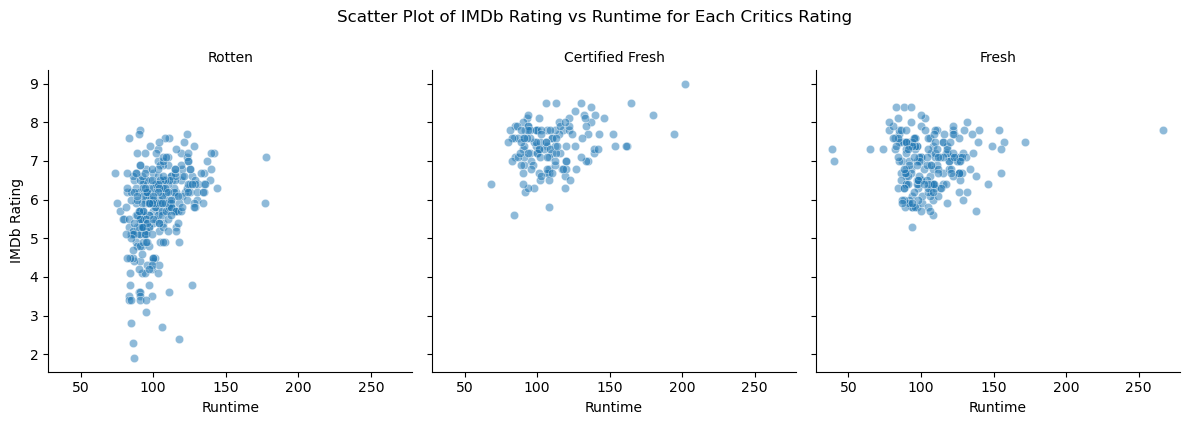

In [23]:
# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `runtime` for each `critics_rating`.

# Create a FacetGrid with scatter plots for each critics_rating
g = sns.FacetGrid(q1movies, col='critics_rating', col_wrap=3, height=4)
g.map(sns.scatterplot, 'runtime', 'imdb_rating', alpha=0.5)
g.set_titles('{col_name}')

# Set axis labels and titles
g.set_axis_labels('Runtime', 'IMDb Rating')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of IMDb Rating vs Runtime for Each Critics Rating', y=1.05) 
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(bonus)   

Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. `runtime` for each of the top 4 `genre` (in order of most frequent), colored with the `critics_rating`.

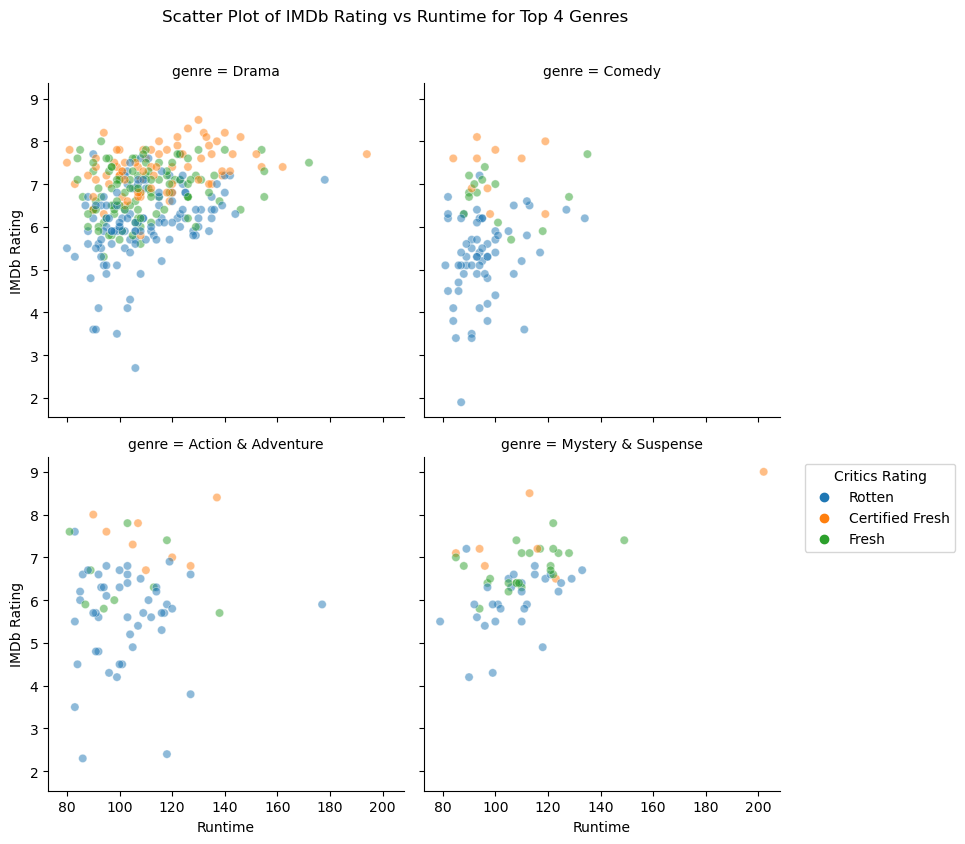

In [24]:
# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `runtime` for each of the top 4 `genre`, colored by the `critics_rating`

# Get the top 4 genres based on frequency
top_genres = q1movies['genre'].value_counts().nlargest(4).index.tolist()

# Filter the DataFrame for the top 4 genres
top_genres_df = q1movies[q1movies['genre'].isin(top_genres)]

# Create a FacetGrid with scatter plots for each genre
g = sns.FacetGrid(top_genres_df, col='genre', col_wrap=2, height=4)
g.map(sns.scatterplot, 'runtime', 'imdb_rating', hue=q1movies['critics_rating'], alpha=0.5)

# Set axis labels
g.set_axis_labels('Runtime', 'IMDb Rating')

# Set main title
g.fig.suptitle('Scatter Plot of IMDb Rating vs Runtime for Top 4 Genres', y=1.05)

# Add legend outside the plot
plt.legend(title='Critics Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<!-- END QUESTION -->

# Q2 - Data Preprocessing

Let's make sure you become familiar using the scaling functions that are available in standard libraries: 

* Python: `MinMaxScaler` and `StandardScaler` or scale in `sklearn.preprocessing`

Here you will use the `MinMaxScaler`.


In [25]:
# train/test data 
q2train = pd.DataFrame({'x1': [20, 37, 40, 60, 85, 120], 
                        'x2': [-10, -8, 52, 3, 18, 23]})
q2test = pd.DataFrame({'x1': [42, 58, 101], 'x2': [-8, 42, 54]})

# Setup a scaler, fit and transform the training data 
scaler = preprocessing.MinMaxScaler()
q2outA = scaler.fit_transform(q2train)
print(q2outA)


# Setup a MinMaxScaler with default range parameters
# fit the scaler to the training data, transform it, and transform the test data
scaler = preprocessing.MinMaxScaler()
q2outBtrain = scaler.fit_transform(q2train)
q2outBtest = scaler.transform(q2test)
print(q2outBtrain)
print(q2outBtest)

[[0.         0.        ]
 [0.17       0.03225806]
 [0.2        1.        ]
 [0.4        0.20967742]
 [0.65       0.4516129 ]
 [1.         0.53225806]]
[[0.         0.        ]
 [0.17       0.03225806]
 [0.2        1.        ]
 [0.4        0.20967742]
 [0.65       0.4516129 ]
 [1.         0.53225806]]
[[0.22       0.03225806]
 [0.38       0.83870968]
 [0.81       1.03225806]]


In [26]:
grader.check("q2")

q2 results: All test cases passed!

# Q3 - Data Preprocessing

Let's make sure you become familiar using the scaling functions that are available in standard libraries: 

* Python: `MinMaxScaler` and `StandardScaler` or scale in `sklearn.preprocessing`

Here you will use the `StandardScaler`.

In [27]:
# train/test data 
# q2train = pd.DataFrame({'x1': [20, 37, 40, 60, 85, 120], 
#                       'x2': [-10, -8, 52, 3, 18, 23]})
# q2test = pd.DataFrame({'x1': [42, 58, 101], 'x2': [-8, 42, 54]})


# Setup a Standard scaler, fit and transform the training data 
scaler = preprocessing.StandardScaler()
q3outA = scaler.fit_transform(q2train)
print(q3outA)

# use StandardScaler
# fit the scaler to the training data, transform it, and transform the test data
scaler = preprocessing.StandardScaler()
q3outBtrain = scaler.fit_transform(q2train)
q3outBtest = scaler.transform(q2test)
print(q3outBtrain)
print(q3outBtest)

[[-1.20221086 -1.08103207]
 [-0.69549389 -0.98702928]
 [-0.60607324  1.83305438]
 [-0.00993563 -0.47001394]
 [ 0.7352364   0.23500697]
 [ 1.77847723  0.47001394]]
[[-1.20221086 -1.08103207]
 [-0.69549389 -0.98702928]
 [-0.60607324  1.83305438]
 [-0.00993563 -0.47001394]
 [ 0.7352364   0.23500697]
 [ 1.77847723  0.47001394]]
[[-0.54645948 -0.98702928]
 [-0.06954939  1.36304044]
 [ 1.21214649  1.92705717]]


In [28]:
grader.check("q3")

q3 results: All test cases passed!

# Q4 - Performance Metrics 

Write a function to calculate: 
(a) true positive rate,
(b) false positive rate, 
(c) accuracy, and 
(d) Matthews Correlation Coefficient (MCC). 

You can make use of `sklearn.metrics` functions. 

The function will have inputs of `y_true` (np.array) - the true label for a set of samples and `y_pred` (np.array) - the predicted labels for a set of samples, and a threshold `thres_value` (float). 

The function returns a list of the true positive rate, false positive rate, accuracy and MCC for the inputs where the predicted labels are thresholded at the provided value (using >= comparisons). 


This function will then be used to create a DataFrames  with rows corresponding with the 10 thresholds (y_pred values) and columns reporting the different thresholds, the true positive rate (TPR), false positive rate (FPR), accuracy (ACC), and Matthews correlation coefficient (MCC).



In [29]:
# Calculate tpr, fpr, accuracy, and MCC on input
# Input: 
#  y_true - sample labels       (np.array)
#  y_pred - sample predictions  (np.array)
#  thres_value - threshold for predictions,  >= 
# Return list of tpr, fpr, accuracy, and MCC 
    
def calc_metrics(y_true, y_pred, thres_value):
     # Threshold predictions based on thres_value
    y_pred_thresh = (y_pred >= thres_value).astype(int)
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresh).ravel()
    # Calculate True Positive Rate (TPR)
    tpr = tp / (tp + fn)
    # Calculate False Positive Rate (FPR)
    fpr = fp / (fp + tn)    
    # Calculate Accuracy (ACC)
    acc = (tp + tn) / (tp + tn + fp + fn)
     # Calculate Matthews Correlation Coefficient (MCC)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) != 0 else 0
    
    return [tpr, fpr, acc, mcc]

y_true = np.array([1,1,0,1,1,0,1,0,0,0])
y_pred = np.array([0.98,0.92,0.85,0.77,0.71,0.64,0.57,0.42,0.34,0.32])

# Create DataFrame to store performance metrics
perfDF = pd.DataFrame(columns=['Threshold', 'TPR', 'FPR', 'ACC', 'MCC'])
perfDF = pd.DataFrame(columns = ['Threshold', 'TPR', 'FPR', 'ACC', 'MCC']) 
i = 0 

for thres in y_pred: 
    tpr_val, fpr_val, acc_val, mcc_val = calc_metrics(y_true, y_pred, thres)
    perfDF.loc[i] = [thres, tpr_val, fpr_val, acc_val, mcc_val]
    i = i+1

perfDF

,Threshold,TPR,FPR,ACC,MCC
0,0.98,0.2,0.0,0.6,0.333333
1,0.92,0.4,0.0,0.7,0.500000
2,0.85,0.4,0.2,0.6,0.218218
3,0.77,0.6,0.2,0.7,0.408248
4,0.71,0.8,0.2,0.8,0.600000
5,0.64,0.8,0.4,0.7,0.408248
6,0.57,1.0,0.4,0.8,0.654654
7,0.42,1.0,0.6,0.7,0.500000
8,0.34,1.0,0.8,0.6,0.333333
9,0.32,1.0,1.0,0.5,0.000000


In [30]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

# Q5 - Plot ROC Curve:

Use the results from Question 4 to plot the ROC curve for the data. 

Note, plot this curve using the standard plotting tools rather than any special library/package available for making ROC plots.

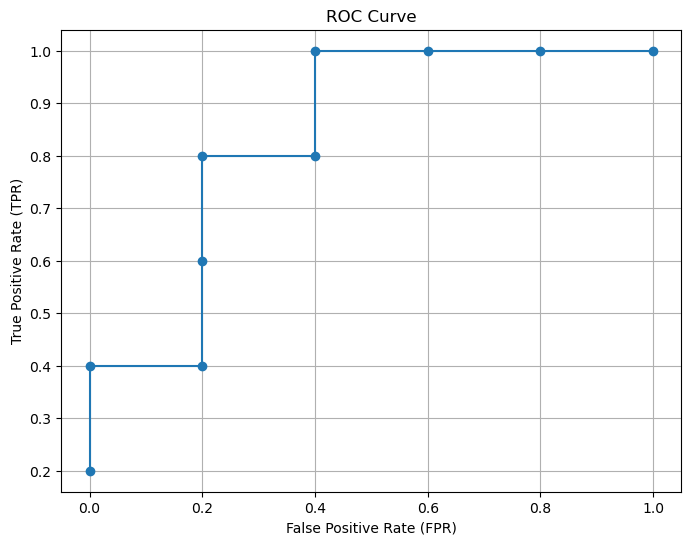

In [31]:
# Calculate TPR and FPR using the calc_metrics function
TPR_list = []
FPR_list = []
thresholds = perfDF['Threshold']

for thres in thresholds:
    tpr_val, fpr_val, _, _ = calc_metrics(y_true, y_pred, thres)
    TPR_list.append(tpr_val)
    FPR_list.append(fpr_val)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(FPR_list, TPR_list, marker='o', linestyle='-')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

# Q6 - NBA Rookies

For this problem you will use a data set of rookie NBA players from 1980 - 2017 seasons.  The dataset was collected from the NBA website API - https://www.nba.com. 

You will use the data from their rookie year to predict whether a player will last at least 5 seasons in the leaque. 

The data consists of variables:

* `PlayerID`, `Player` - variables to identify individual samples (ignore for prediction)
* `Tm`, `Year` - variables describing the year the player started and for what team (ignore for prediction)  
* `TARGET` - This is the target / class feature to be predicted (whether the player was in the league for at least 5 years). 

The remaining variables are predictor variables for the models.  They come in pairs "*\_DIFF" and "*\_A" reporting the given statistic as the difference between Team A and Team B and the statistic itself for Team A. 

* `Pos` - position of the player, power forward, point guard, shooting guard, center, etc.
* `Age` - player age
* `G` - sum of number of games played
* `GS` - sum of number of games started
* `MP` - sum of number of minutes played
* `PTS` - sum of number of points scored
* `FG` - sum of number of field goals made (both 2 and 3 pointers)
* `FGA` - sum of number of field goals attempted
* `FG%` - FG / FGA, percentage of field goals made 
* `3P` - sum of the number of 3 pointers made
* `3PA` - sum of the number of 3 pointers attempted
* `3P%` - 3P / 3PA, percentage of 3 pointers made
* `2P` - sum of the number of 2 point shots made
* `2PA` - sum of the number of 2 point shots attempted
* `2P%` - 2P / 2PA, percentage of 2 point shots made
* `eFG%` - Effective Field Goal Percentage, (`FG` + 0.5 * `3P`)/`FGA`
* `FT` - sum of the number of free throws made
* `FTA` - sum of the number of free throws attempted
* `FT%` - FT / FTA, percentage of free throws made
* `ORB` - sum of the number of offensive rebounds
* `DRB` - sum of the number of defensive rebounds
* `TRB` - sum of the number of total rebounds
* `AST` - sum of the number of assists
* `STL` - sum of the number of steals
* `BLK` - sum of the number of blocks
* `TOV` - sum of the number of turnovers
* `PF` - sum of the number of personal fouls

More information on the stats used can be found: https://www.nba.com/stats/help/glossary   
*Note, some of the abbreviations used here are slightly different* 


## Q6(a) - Load Data 

Load the `nba` data.


In [32]:
nba = pd.read_csv('nba_rookies.csv') 
nba.head()

,PlayerID,Player,Pos,Age,Tm,Year,G,GS,MP,PTS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,TARGET
0,abdelal01,Alaa Abdelnaby,PF,22,POR,1991,43,0.0,290,135,...,0.568182,27,62,89,12,4,12,22,39,True
1,abdulma02,Mahmoud Abdul-Rauf,PG,21,DEN,1991,67,19.0,1505,942,...,0.857143,34,87,121,206,55,4,110,149,True
2,abdulta01,Tariq Abdul-Wahad,SG,23,SAC,1998,59,16.0,959,376,...,0.672000,44,72,116,51,35,13,65,81,True
3,abdursh01,Shareef Abdur-Rahim,PF,20,VAN,1997,80,71.0,2802,1494,...,0.745665,216,339,555,175,79,79,225,199,True
4,abrinal01,Álex Abrines,SG,23,OKC,2017,68,6.0,1055,406,...,0.897959,18,68,86,40,37,8,33,114,False


In [33]:
grader.check("q6a")

q6a results: All test cases passed!

## Q6(b) - Missing Data 

Let's investigate any missing values in the nba data. 

First, calculate and report the percentage of missing data for that variable (percentage of rows) in a DataSeries, `miss_nba`. 

In [34]:
miss_nba = (nba.isna().sum() / len(nba)) * 100
miss_nba

PlayerID     0.000000
Player       0.000000
Pos          0.000000
Age          0.000000
Tm           0.000000
Year         0.000000
G            0.000000
GS           4.807325
MP           0.000000
PTS          0.000000
FG           0.000000
FGA          0.000000
FG%          0.763068
3P           0.000000
3PA          0.000000
3P%         23.693247
2P           0.000000
2PA          0.000000
2P%          0.915681
eFG%         0.763068
FT           0.000000
FTA          0.000000
FT%          6.676841
ORB          0.000000
DRB          0.000000
TRB          0.000000
AST          0.000000
STL          0.000000
BLK          0.000000
TOV          0.000000
PF           0.000000
TARGET       0.000000
dtype: float64

In [35]:
grader.check("q6b")

q6b results: All test cases passed!

Explore where these missing values you in the following code cell. 

**BE SURE TO COMMENT OUT YOUR CODE BEFORE SUBMITTING**

In [36]:
# explore where the missing values are in your data. 


## Q6(c) - Handle missing data

By investigating where the missing data is, I hope you discovered the following: 

The missing values reside in two main types of columns (and for two different reasons):
* `GS` the game started column has missing values for almost all rookies in the 1980 and 1981 seasons with a few exceptions, e.g., Larry Bird, Clint Richardson, etc.
* Columns that calculate a percentage, `FG%`, `3P%`, `2P%`, `eFG%`, `FT%`
Here the missing values are due to a divide by zero.

Due to the different reasons for the data missing values will be handled differently in each situation. 

First, the missing values for `GS`, because there is not way to impute these values (and there are so few players in the 1980 and 1981 season having this information), the **all** samples from these two seasons should be deleted. 

For the missing values in the "percentage" columns, replace those missing values with 0. 

Call you new DataFrame after performing these operations `nba2`.


*Note* There may be situations where how you handle missing data (in particular, using imputation methods) should be done in the workflow/pipeline after already splitting for training/testing data in order to avoid possible data leakage.  However, the methods we employ here for dealing the the missing data are not using global properties to perform the imputation, therefore can be done at this state of the analysis. 

In [37]:
nba2 = nba.copy()
nba2.drop(nba2[(nba2['Year'] == 1980) | (nba2['Year'] == 1981)].index, inplace=True)
cols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in cols:
    nba2[col] = pd.to_numeric(nba2[col], errors='coerce').fillna(0)

nba2.head()

,PlayerID,Player,Pos,Age,Tm,Year,G,GS,MP,PTS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,TARGET
0,abdelal01,Alaa Abdelnaby,PF,22,POR,1991,43,0.0,290,135,...,0.568182,27,62,89,12,4,12,22,39,True
1,abdulma02,Mahmoud Abdul-Rauf,PG,21,DEN,1991,67,19.0,1505,942,...,0.857143,34,87,121,206,55,4,110,149,True
2,abdulta01,Tariq Abdul-Wahad,SG,23,SAC,1998,59,16.0,959,376,...,0.672000,44,72,116,51,35,13,65,81,True
3,abdursh01,Shareef Abdur-Rahim,PF,20,VAN,1997,80,71.0,2802,1494,...,0.745665,216,339,555,175,79,79,225,199,True
4,abrinal01,Álex Abrines,SG,23,OKC,2017,68,6.0,1055,406,...,0.897959,18,68,86,40,37,8,33,114,False


In [38]:
grader.check("q6c")

q6c results: All test cases passed!

## Q6(d) - Labels 

Let's understand the what we should expect as a baseline performance for predicting whether the rookie play remains in the league for at least 5 years. 

(i). What fraction of players have a positive target label (in the league for at least 5 years)? Value should be in between 0 and 1.  
(ii).  What should a constant classifier model predict?   A *constant classifier* always predicts the same value no matter the input.   
(iii).  What is the error rate of the constant classifier? Value should be in between 0 and 1. 

Answer the following questions below.  Note, you should not use any `sklearn` functions, but simply look at properties of the data labels. 


In [39]:
q6d_i = nba2['TARGET'].sum() / len(nba2)

q6d_ii = True

q6d_iii = 1 - q6d_i

In [40]:
grader.check("q6d")

q6d results: All test cases passed!

## Q6(e) - Prepare the data 

At this point, we need to set up the data in order to be used in the classification models. 

We want to create a DataFrame `nbaX` for the predictor variables and `nbaY` for the target variable. 

The target variable, `nbaY` will just be the `Target` column of the `nba2` data set. 

The predictor variables have more considerations. 

We want to exclude player information such as IDs, `PlayerID` and names `Player`, that are identifying and not predictive.   

You should also exclude these other factors (note, that some of these variables may in fact be predictive but we are going to exclude at this time): 

* `POS` - player position
* `Tm` - team
* `Year` - rookie year

Finally, several of the numeric predictive variables are not only related, but can be directly calculated from one another, e.g., `FG%` = `FG` / `FGA`.  Having variables that are closely related, or in this case redundant may actually hinder the predictive models. 

Therefore, exclude the following variables: `FG`, `3P`, `2P`, `eFG%`, `FT`, `TRB`. 

In [41]:
nbaY = nba2['TARGET']
nbaX = nba2.copy()
cols = ['PlayerID', 'Player', 'Age', 'Pos', 'Tm', 'Year', 'FG', '3P', '2P', 'eFG%', 'FT', 'TRB', 'TARGET']
nbaX.drop(columns=cols, inplace=True)
print(nbaX.shape)
print(nbaY.shape)

(2487, 19)
(2487,)


In [42]:
grader.check("q6e")

q6e results: All test cases passed!

## Q6(f) - Model Selection and Evaluation: Three-fold Split

Split the data into training, validation and test sets with 60, 20, and 20% of the data respectively. Make sure to split the data such that the distribution of class labels is approximately equal across splits - “stratify”.

Set the seed for the random generator in `random_state` to ”4821”

In [43]:
# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(nbaX, nbaY, test_size=0.2, random_state=4821, stratify=nbaY)

# Split trainval into train + val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=4821, stratify=y_trainval)

In [44]:
grader.check("q6f")

q6f results: All test cases passed!

## Q6(g) - Scaling 

Scale the predictor data with standard scaling (Gaussian normalizaiton). 

Make sure to use training data set to set scaling parameters and apply those parameters to scaling the training and validation data.

Use the train+val to scale the train+val data, and use those parameters to scale the test data to evaluate the best model. 

Helpful functions: Python - `StandardScaler` from `sklearn.preprocessing`.

In [45]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

scaler_final = StandardScaler()
X_trainval_sc = scaler.fit_transform(X_trainval)
X_test_sc = scaler.transform(X_test)

In [46]:
grader.check("q6g")

q6g results: All test cases passed!

## Q6(h) -  KNN - K Nearest Neighbors
For values of k, [3, 7, 11, 15, 19, 23, 27, 31], find the best k-nearest-neighbor classifier using the three-fold split of data. 

* fit a k nearest neighbors model to the training data for each value of k
* evaluate the classifier on the training and validation set using AUC
* select the best value of k
* create a model on train+validation with the *best* value of k 
* evaluate the classifier on the test data. 
* plot the training and validation performance vs k;  
add a line showing the test performance

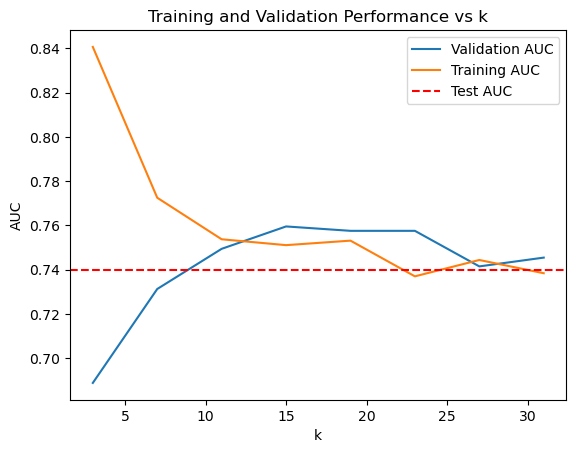

Best k:  15
Test Perf:  0.739789


In [47]:
kvals = [3, 7, 11, 15, 19, 23, 27, 31]

knn_auc_val = np.zeros((1,len(kvals)))
knn_auc_tr = np.zeros((1,len(kvals)))

# fit a k nearest neighbors model to the training data
# evaluate the classifier on the training and validation set using auc
for i in range(len(kvals)):
    # Fit a KNN model to the data at k
    knn = KNeighborsClassifier(n_neighbors=kvals[i])
    knn.fit(X_train_sc, y_train)
    
    # Calculate AUC scores for the training and validation sets
    knn_auc_val[0][i] = roc_auc_score(y_val, knn.predict(X_val_sc))
    knn_auc_tr[0][i] = roc_auc_score(y_train, knn.predict(X_train_sc))

# select the best value of k
knn_bestk = kvals[np.argmax(knn_auc_val[0])]

# create a best model on train+validation
best_knn = KNeighborsClassifier(n_neighbors=knn_bestk)
best_knn.fit(X_trainval, y_trainval)

# evaluate the classifier on the test data.
knn_auc_test = roc_auc_score(y_test, knn.predict(X_test_sc))

# plot the training and validationing performance vs k.
#   add a line for test performance 

plt.plot(kvals, knn_auc_val[0], label='Validation AUC')
plt.plot(kvals, knn_auc_tr[0], label='Training AUC')
plt.axhline(y=knn_auc_test, color='r', linestyle='--', label='Test AUC')

plt.xlabel('k')
plt.ylabel('AUC')
plt.title('Training and Validation Performance vs k')
plt.legend()

plt.show()

print('Best k:  %d' % (knn_bestk))
print('Test Perf:  %.6f' % (knn_auc_test))

In [48]:
grader.check("q6h")

q6h results: All test cases passed!

## Q6(i) - Decision Trees

For values of max_leaf_nodes nodes [5, 10, 25, 50, 75, 100], fit the Decision Trees classifier to the training data. 

- fit a decision tree model to the training data (use `random_state=4821`) for each of the max_leaf_nodes values
- evaluate the classifier on the training and validation set using AUC
- select the best max_leaf_nodes
- retrain the a model on train+validation with the *best* value of max_leaf_nodes 
- report the auc on the testing data.
- plot the train and validation AUC vs max_leaf_nodes;  
add a line for the test AUC performance 
- print out the best tree.

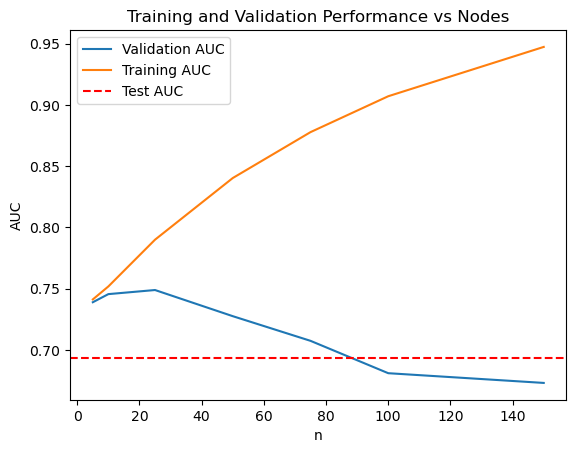

Best max_leaf_nodes:  25
Test Perf:  0.693573


In [49]:
nodes = [5, 10, 25, 50, 75, 100, 150]

dt_auc_val = np.zeros((1,len(nodes)))
dt_auc_tr = np.zeros((1,len(nodes)))

# fit a decision tree model to the training data (use random_state=4821)
# evaluate the classifier on the training and validation set using auc
for i in range(len(nodes)):
    # Fit a DTC model to the data at n
    dt = DecisionTreeClassifier(max_leaf_nodes=nodes[i], random_state=4821)
    dt.fit(X_train_sc, y_train)
    
    # Calculate AUC scores for the training and validation sets
    dt_auc_val[0][i] = roc_auc_score(y_val, dt.predict(X_val_sc))
    dt_auc_tr[0][i] = roc_auc_score(y_train, dt.predict(X_train_sc))

# select the best max_leaf_nodes
dt_bestn = nodes[np.argmax(dt_auc_val[0])]

# retrain the best model on train+validation
best_dt = DecisionTreeClassifier(max_leaf_nodes=dt_bestn, random_state=4821)
best_dt.fit(X_trainval, y_trainval)

# report the auc on the testing data.
dt_auc_test = roc_auc_score(y_test, dt.predict(X_test_sc))

# plot the train and validation auc vs max_leaf_nodes.
#   add a line for test performance 
plt.plot(nodes, dt_auc_val[0], label='Validation AUC')
plt.plot(nodes, dt_auc_tr[0], label='Training AUC')
plt.axhline(y=dt_auc_test, color='r', linestyle='--', label='Test AUC')

plt.xlabel('n')
plt.ylabel('AUC')
plt.title('Training and Validation Performance vs Nodes')
plt.legend()

plt.show()

print('Best max_leaf_nodes:  %d' % (dt_bestn))
print('Test Perf:  %.6f' % (dt_auc_test))

[Text(0.533046132238548, 0.975, 'x[13] <= -0.314\ngini = 0.5\nsamples = 1491\nvalue = [737, 754]'),
 Text(0.24116789109766637, 0.925, 'x[2] <= -0.773\ngini = 0.411\nsamples = 795\nvalue = [565, 230]'),
 Text(0.07260155574762317, 0.875, 'x[16] <= -0.241\ngini = 0.296\nsamples = 426\nvalue = [349, 77]'),
 Text(0.06568712186689715, 0.825, 'x[11] <= 0.469\ngini = 0.287\nsamples = 420\nvalue = [347, 73]'),
 Text(0.020743301642178046, 0.775, 'x[17] <= -0.705\ngini = 0.237\nsamples = 299\nvalue = [258, 41]'),
 Text(0.013828867761452032, 0.725, 'gini = 0.213\nsamples = 273\nvalue = [240, 33]'),
 Text(0.027657735522904063, 0.725, 'x[11] <= -0.311\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(0.020743301642178046, 0.675, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.03457216940363008, 0.675, 'x[15] <= -0.677\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.020743301642178046, 0.625, 'x[9] <= 0.569\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.013828867761452032, 0.575

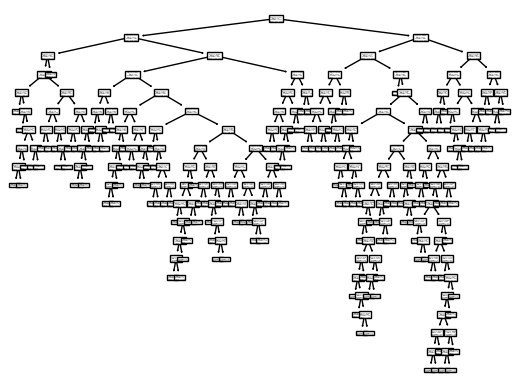

In [50]:
# print out the tree
tree.plot_tree(dt)

In [51]:
grader.check("q6i")

q6i results: All test cases passed!

## Q6(j) -  Naive Bayes 

Train a Gaussian Naive Bayes model on training + validation data and report the training+val and testing data performance (auc). 


In [52]:
# q6j

nb = GaussianNB()
nb.fit(X_trainval_sc, y_trainval)

# Predict probabilities for both the combined training and validation sets
nb_pred_trainval = nb.predict(X_trainval_sc)
nb_pred_test = nb.predict(X_test_sc)

nb_auc_trainval = roc_auc_score(y_trainval, nb_pred_trainval)
nb_auc_test = roc_auc_score(y_test, nb_pred_test)

In [53]:
grader.check("q6j")

q6j results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**NOTE** the submission must be run on the campus linux machines.  See the instruction in the Canvas assignment.

In [54]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:


